# Sabermetrics: Finding the Ideal Statistics to Evaluate MLB Hitters
#### Andrew Scheid


## Introduction
Sabermetrics is "the search for objective knowledge about baseball,” according to Bill James, one of the creators of SABR, an organization of baseball fans dedicated to statistical analysis. From the inception of the sport of baseball in the 1800s to modern day, statistics have always been at the forefront. The idea of evaluating a player by their numbers has never been more prevalent than in modern day baseball. With the increasing popularity and comprehensiveness of sabermetrics, an observer can know everything that they need to evaluate them without actually ever seeing them play. From simple counting stats like hits and strikeouts to advanced batted ball data like hard hit percentage and fly ball percentage, there is no shortage of available data on these players. The ability to easily evaluate players gives teams a statistical advantage over others. While the Moneyball era was a good start to digging deeper into player statistics, the Sabermetrics era goes even further and looks at countless different stats to evaluate players.

Null Hypothesis:
All statistics will evaluate players with the same effectiveness

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## The Data

In [105]:
saber = pd.read_csv("batters-saber.csv")
saber = saber.drop(columns=['playerid'])
saber.head(10)

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,BB,IBB,HBP,SF,SH,WAR,BABIP,Bat,wRC+
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,81,8,8,5,0,10.4,0.368,62.2,185
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,122,25,10,4,0,9.8,0.346,66.1,191
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,69,11,4,7,0,5.9,0.375,54.4,170
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,68,2,7,2,0,7.6,0.373,52.6,166
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,96,2,12,3,0,7.6,0.289,48.0,157
5,Jose Ramirez,Indians,157,578,698,156,75,38,4,39,106,15,8,6,0,8.0,0.252,38.5,146
6,Nolan Arenado,Rockies,156,590,673,175,97,38,2,38,73,10,3,6,1,5.7,0.314,26.0,132
7,Paul Goldschmidt,Diamondbacks,158,593,690,172,99,35,5,33,90,11,6,0,0,5.1,0.359,37.5,145
8,Brandon Nimmo,Mets,140,433,535,114,61,28,8,17,80,2,22,0,0,4.5,0.351,31.9,149
9,Trevor Story,Rockies,157,598,656,174,89,42,6,37,47,3,7,4,0,5.0,0.345,21.7,127


This dataset, compiled from Fangraphs, one of the leading authorities on baseball statistics, is comprised of various counting stats for all qualified hitters for the 2018 MLB season. To be a qualified hitter, a player must have enough 3.1 plate appearances per game or 502 for a 162 game season. In this dataset we have:

Basic Information:
    - Name
    - Team
Counting Stats:
    - Games, At Bats, Hits, Singles, Doubles, Triples, Home Runs, 
    - Base on Balls (Walks), Intentional Walks, Hit By Pitch, Sacrifice Flies, Sacrifice Hits
Baseline Sabermetric Stats: 
    - Wins Above Replacement 
    - Batting Average on Balls in Play 
    - Batting Runs
    - Weighted Runs Created Plus

## WAR (Wins Above Replacement)
Wins Above Replacement (WAR) is an attempt to summarize a player’s total contributions to their team in one statistic. WAR is shown as a decimal number and represents the amount of Wins that a player has contributed to their team compared to replacement level (someone from the bench of the minor leagues) player. It takes into consideration a players' hitting, running, and fielding abilities into consideration, and assigns a value to each play made by a player. These values cannot be determined by just looking at stats, instead players are assigned positive or negative points for each play that they make by Fangraphs. The below dataframe shows the top 10 hitters in the MLB in 2018 ranked by their WAR.

In [106]:
WAR = saber[['Name', 'Team', 'WAR']]
WAR = WAR.sort_values(by=['WAR'], ascending=False)
WAR.head(10)

,Name,Team,WAR
0,Mookie Betts,Red Sox,10.4
1,Mike Trout,Angels,9.8
5,Jose Ramirez,Indians,8.0
20,Francisco Lindor,Indians,7.6
3,Christian Yelich,Brewers,7.6
4,Alex Bregman,Astros,7.6
19,Matt Chapman,Athletics,6.5
10,Anthony Rendon,Nationals,6.3
12,Manny Machado,- - -,6.2
2,J.D. Martinez,Red Sox,5.9


## Graphing WAR

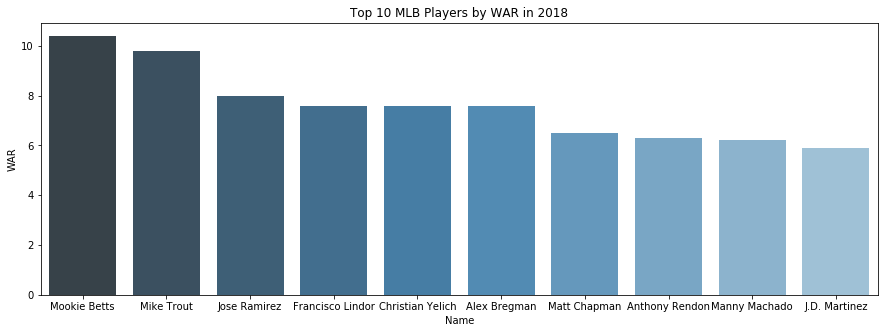

In [107]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="WAR", data=WAR.head(10), palette="Blues_d")
ax.set_xticklabels(WAR['Name'], rotation='horizontal', fontsize=10)
ax.set_title('Top 10 MLB Players by WAR in 2018')
plt.show()

## WAR, in context
Below, are the top 75 players in the MLB in 2018 by WAR

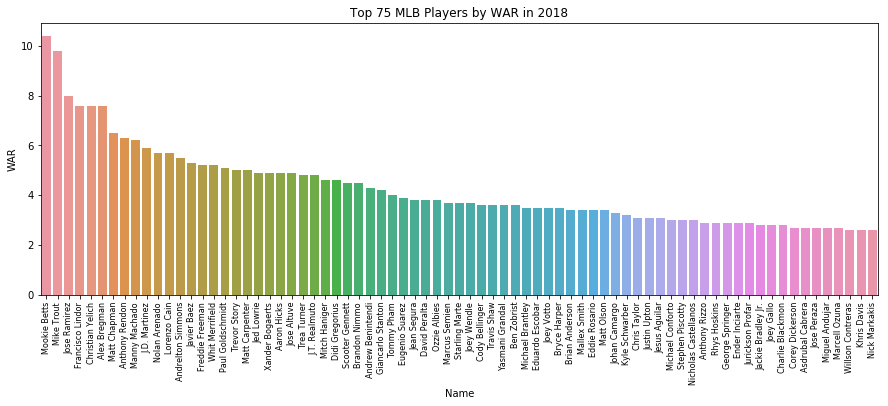

In [108]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="WAR", data=WAR.head(75))
ax.set_xticklabels(WAR['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by WAR in 2018')
plt.show()

We can see that apart from a few standout players, the rest of the players seem to be fairly comparable. There is still a steady decline, but the different between the 1st best (Mookie Betts) and 10th best (J.D. Martinez) is much larger than the difference between the 65th best (Jackie Bradley Jr.) and the 75th best (Nick Markakis)

## Batting Runs
Batting Runs (Bat) are a subset of WAR, focusing only on value added by a player while batting, ignoring baserunning and fielding. I will be using this stat as a baseline for comparing and evaluating the other derived statistics. Again, because Bat cannot be derived from plain counting statistics, it is not in consideration for the most effective stat. Below are the top 10 players in the MLB in 2018 in Batting Runs.

In [109]:
bat = saber[['Name', 'Team', 'WAR', 'Bat']]
bat = bat.sort_values(by=['Bat'], ascending=False)
bat.head(10)

,Name,Team,WAR,Bat
1,Mike Trout,Angels,9.8,66.1
0,Mookie Betts,Red Sox,10.4,62.2
2,J.D. Martinez,Red Sox,5.9,54.4
3,Christian Yelich,Brewers,7.6,52.6
4,Alex Bregman,Astros,7.6,48.0
5,Jose Ramirez,Indians,8.0,38.5
7,Paul Goldschmidt,Diamondbacks,5.1,37.5
12,Manny Machado,- - -,6.2,34.5
8,Brandon Nimmo,Mets,4.5,31.9
15,Matt Carpenter,Cardinals,5.0,31.7


## Graphing Batting Runs

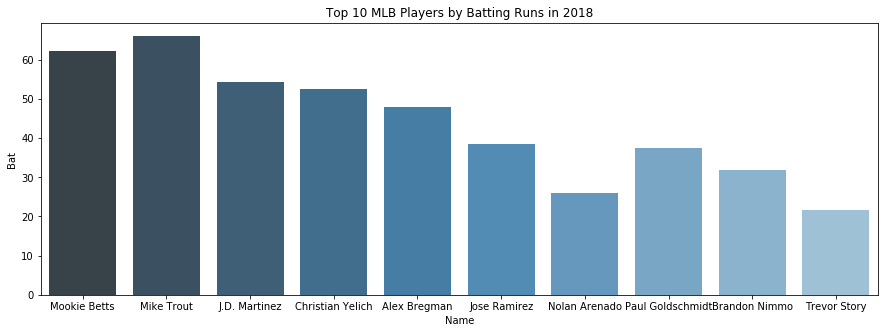

In [110]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="Bat", data=saber.head(10), palette="Blues_d")
ax.set_xticklabels(saber['Name'], rotation='horizontal', fontsize=10)
ax.set_title('Top 10 MLB Players by Batting Runs in 2018')
plt.show()

## Batting Runs, in context

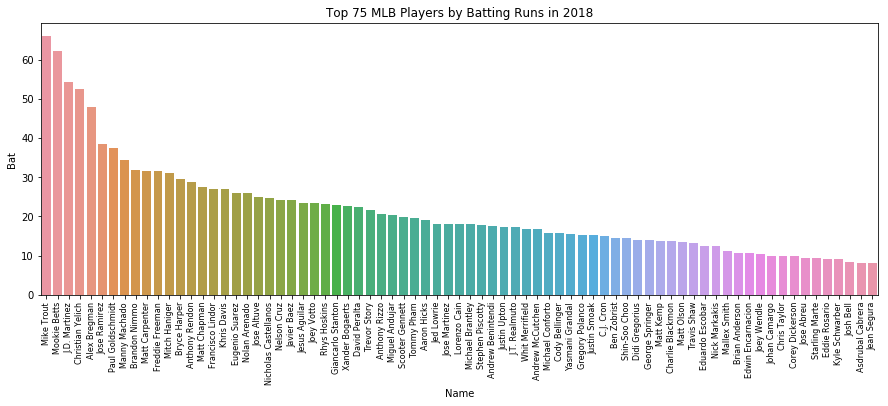

In [147]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="Bat", data=bat.head(75))
ax.set_xticklabels(bat['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Batting Runs in 2018')
plt.show()

By removing fielding and baserunning, we get a better comparison between players and their hitting abilities. The graph has a steeper decline than the one for WAR, showing the skill gap between players. Mike Trout and Mookie Betts remain at the top, but after that there is a drastic change in the rankings. This gives the best look at the value that hitters have provided for their teams in 2018.

In [112]:
#Function for plotting names on our scatter plots
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + .2, point['y'], str(point['val']))

## Batting Average (AVG)
Batting Average is the simplest counting stat for evaluating a player's hitting ability. It is derived simply by dividing a player's number of hits (H) by their at-bats (AB). While it is one of the least useful stats for evaluating a player completely, it can be useful to get a quick look at their performance. In the end, the goal of baseball is to get hits, and batting average simply shows how effective a player has been at doing that. Because of its simplicity, it is still the most common stat referenced for a hitter. When watching a baseball game, either on TV or in person, it is shown next to each player's name in the lineup, and is flashed on the screen or scoreboard before every at-bat. Batting average is still a worthwhile statistic to have, but it should never be used to define a players performance without also looking at other underlying statistics. Below are the top 5 hitters in 2018 by Batting Average.

In [113]:
avg = saber.copy()
avg['AVG'] = avg['H'] / avg['AB']
avg = avg.sort_values(by=['AVG'], ascending=False)

avg_clean = avg.copy()
avg_clean = avg_clean.drop(columns=['G','PA','1B','2B','3B','HR','BB','IBB','HBP','SF','SH', 'BABIP', 'wRC+'])
avg_clean.head()

,Name,Team,AB,H,WAR,Bat,AVG
0,Mookie Betts,Red Sox,520,180,10.4,62.2,0.346154
2,J.D. Martinez,Red Sox,569,188,5.9,54.4,0.330404
3,Christian Yelich,Brewers,574,187,7.6,52.6,0.325784
26,Jose Altuve,Astros,534,169,4.9,25.0,0.316479
1,Mike Trout,Angels,471,147,9.8,66.1,0.312102


## Batting Average, in context

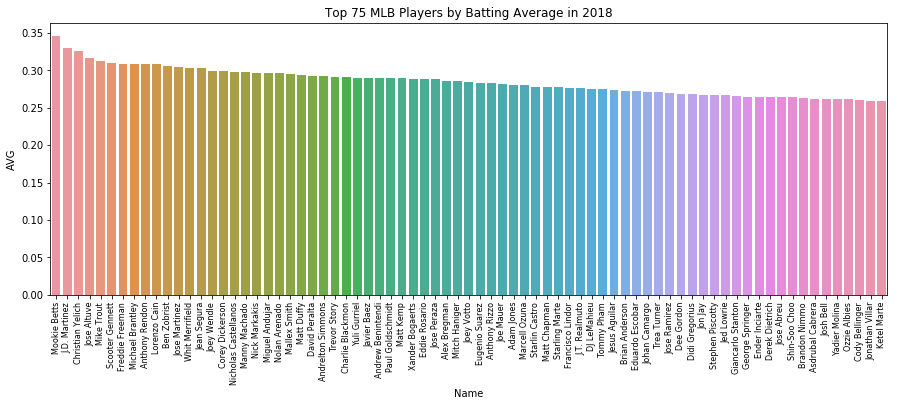

In [114]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="AVG", data=avg.head(75))
ax.set_xticklabels(avg['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Batting Average in 2018')
plt.show()

This graph does not show much to differentiate the players. We see 3 clear top performers, but after that there is a slow decline. Because Batting Average only takes into account two counting stats, it is hard for one player to really separate themselves from the pack

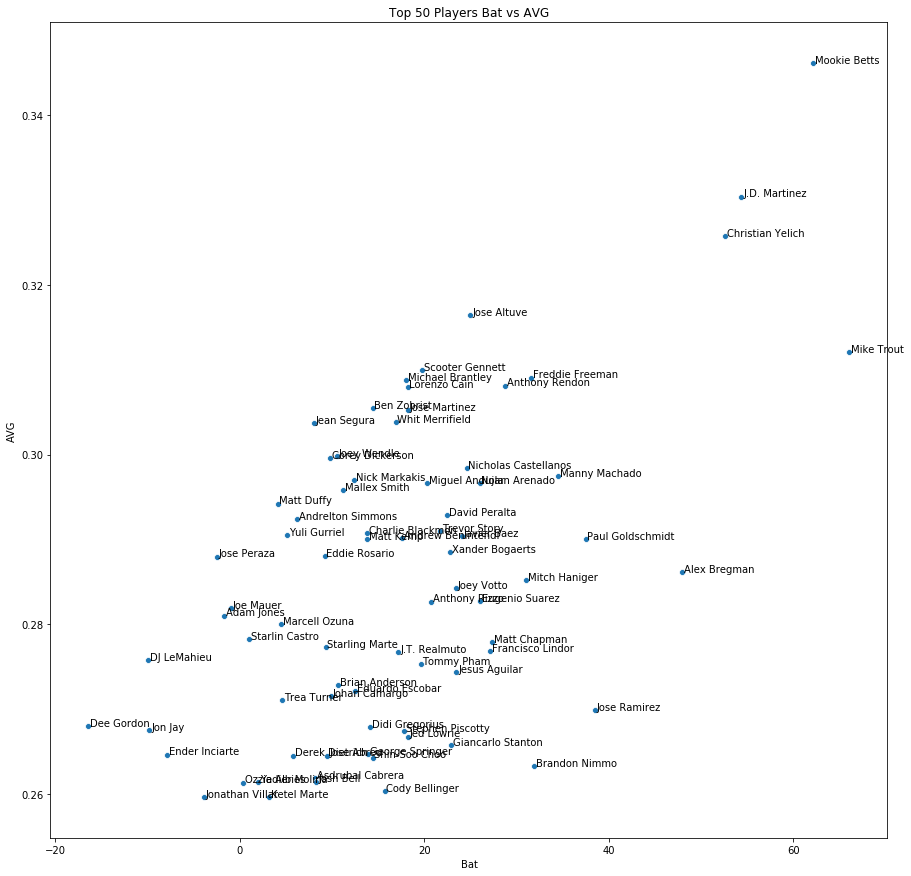

In [115]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="AVG", data=avg.head(75), markers=True)
ax.set_title("Top 50 Players Bat vs AVG")

label_point(avg.head(75).Bat, avg.head(75).AVG, avg.head(75).Name, plt.gca())

Looking at the above scatter plot, we can see that there is no real correlation between Batting Average and Batting Runs. This is because simply getting hits does not necessarily result in creating runs. The statistic is not specific enough, as there is no difference between a single, double, triple, or home run in Batting Average because they are all considered hits. Also, it does not take into consideration walks, which are an important part of creating runs as a hitter in baseball.

## On Base Percentage (OBP)
On Base Percentage measures the most fundamental part of being a hitter: not making outs. Players with high OBPs are those that are efficient at getting on base, whether through getting a hit or drawing a walk. OBP is another stat that is reference often, especially referring to "lead-off hitters" which are the players that come to bat first for a team. The main job of these players is to get on base to start the game in order for another player to hit them home, resulting in runs for their team. Although this is stat is slightly more telling of a player's ability than batting average, it still does not give us enough. While it can be helpful to know how often a player does not make an out, it is hardly the most important aspect of evaluating a player. As we can see in the chart below, 2 of the top 5 players in OBP fall outside of the top 5 in Bat, with one of them ranking at 19th. 

In [116]:
obp = avg.copy()
obp['OBP'] = (obp['H'] + obp['BB'] + obp['HBP']) / (obp['AB'] + obp['BB'] + obp['HBP'] + obp['SF'])
obp = obp.sort_values(by=['OBP'], ascending=False)

obp_clean = obp.copy()
obp_clean = obp_clean.drop(columns=['G','1B','2B','3B','HR','SH','BABIP', 'wRC+'])
obp_clean.head()

,Name,Team,AB,PA,H,BB,IBB,HBP,SF,WAR,Bat,AVG,OBP
1,Mike Trout,Angels,471,608,147,122,25,10,4,9.8,66.1,0.312102,0.459638
0,Mookie Betts,Red Sox,520,614,180,81,8,8,5,10.4,62.2,0.346154,0.438111
18,Joey Votto,Reds,503,623,143,108,6,9,3,3.5,23.4,0.284294,0.417335
8,Brandon Nimmo,Mets,433,535,114,80,2,22,0,4.5,31.9,0.263279,0.403738
3,Christian Yelich,Brewers,574,651,187,68,2,7,2,7.6,52.6,0.325784,0.402458


## On Base Percentage, in context

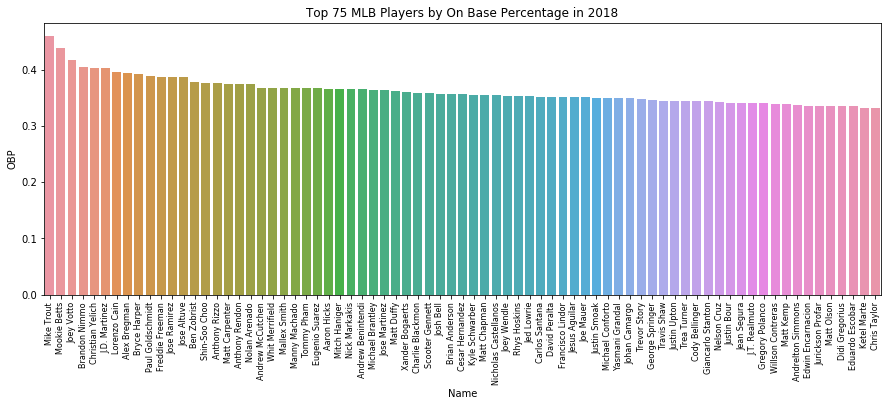

In [117]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="OBP", data=obp.head(75))
ax.set_xticklabels(obp['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by On Base Percentage in 2018')
plt.show()

This graph looks very similar to Batting Average, mostly because it has the same flaws. While OBP takes into consideration a few more counting stats, it is still not enough. All hits are still considered the same in OBP, and that does not show the true skill of most players

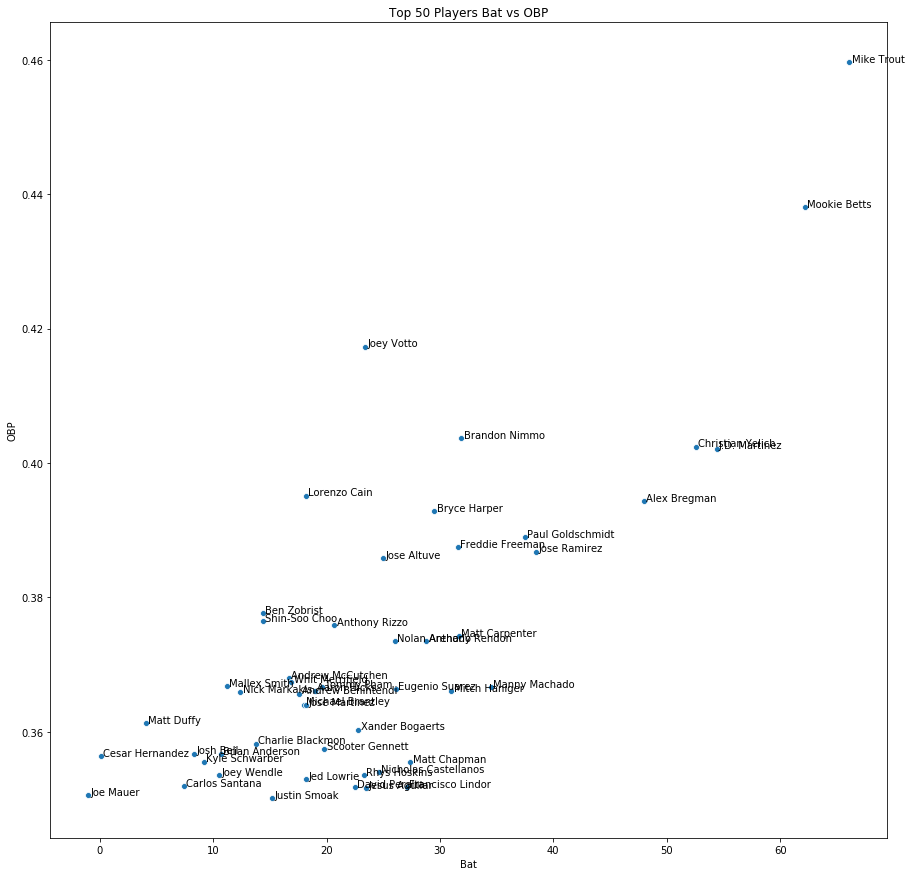

In [118]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="OBP", data=obp.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs OBP")

label_point(obp.head(50).Bat, obp.head(50).OBP, obp.head(50).Name, plt.gca())

This plot is a bit better than the one for Batting Average, but it is still too spread out. We can see that a high OBP does not necessarily mean a high Batting Runs stat. OBP is a good supporting stat, but it should not be used to fully represent a player.

## Slugging Percentage (SLG)
Slugging Percentage attempts to solve some of the problems with Batting Average. Like Batting Average, Slugging Percentage shows a batter's ability to get hits. Unlike Batting Average, Slugging Percentage gives credit to hitters for the type of hit based on the number of bases for their hit. A single gets 1 base, a double gets 2, a triple gets 3 and finally a home run gets 4. With this stat, we are able to separate more skilled hitters from the others. With Batting Average a hitter that hits nothing but singles would have the same AVG as someone who hits lots of doubles, triples, and home runs. Now, the better hitter will have a much higher slugging percentage than the other. By looking at the below chart, we can see that we have done a better job at getting some of the top players in batting runs. All of the listed players are in the top 10, and we have 4 of the top 5. Clearly, this stat favors players that hit home runs, as they are guaranteed runs, while a single, double, or triple has no guarantees associated with it.

In [119]:
slg = obp.copy()
slg['SLG'] = (slg['1B'] + 2 * slg['2B'] + 3 * slg['3B'] + 4 * slg['HR']) / slg['AB']
slg = slg.sort_values(by=['SLG'], ascending=False)

slg_clean = slg.copy()
slg_clean = slg_clean.drop(columns=['G','PA','H','BB','IBB','HBP','SF','SH', 'BABIP', 'wRC+'])
slg_clean.head()

,Name,Team,AB,1B,2B,3B,HR,WAR,Bat,AVG,OBP,SLG
0,Mookie Betts,Red Sox,520,96,47,5,32,10.4,62.2,0.346154,0.438111,0.640385
2,J.D. Martinez,Red Sox,569,106,37,2,43,5.9,54.4,0.330404,0.402157,0.629174
1,Mike Trout,Angels,471,80,24,4,39,9.8,66.1,0.312102,0.459638,0.628450
3,Christian Yelich,Brewers,574,110,34,7,36,7.6,52.6,0.325784,0.402458,0.597561
9,Trevor Story,Rockies,598,89,42,6,37,5.0,21.7,0.290970,0.347561,0.566890


## Slugging Percentage, in context

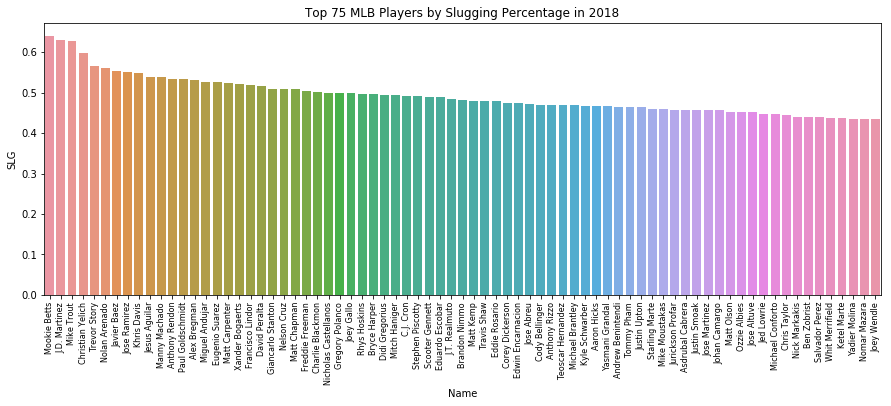

In [120]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="SLG", data=slg.head(75))
ax.set_xticklabels(slg['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Slugging Percentage in 2018')
plt.show()

While Slugging Percentage is definitely a step in the right direction, the graph shows that it is fairly similar to the other stats. Upon analyzing the names in the top 20, the majority of them are heavy home run hitters. Because Slugging Percentage gives 4 points for a home run, these hitters generally rise to the top. While this is not necessarily a bad thing, it still ignores some good, non home run hitters and forces them lower down the list.

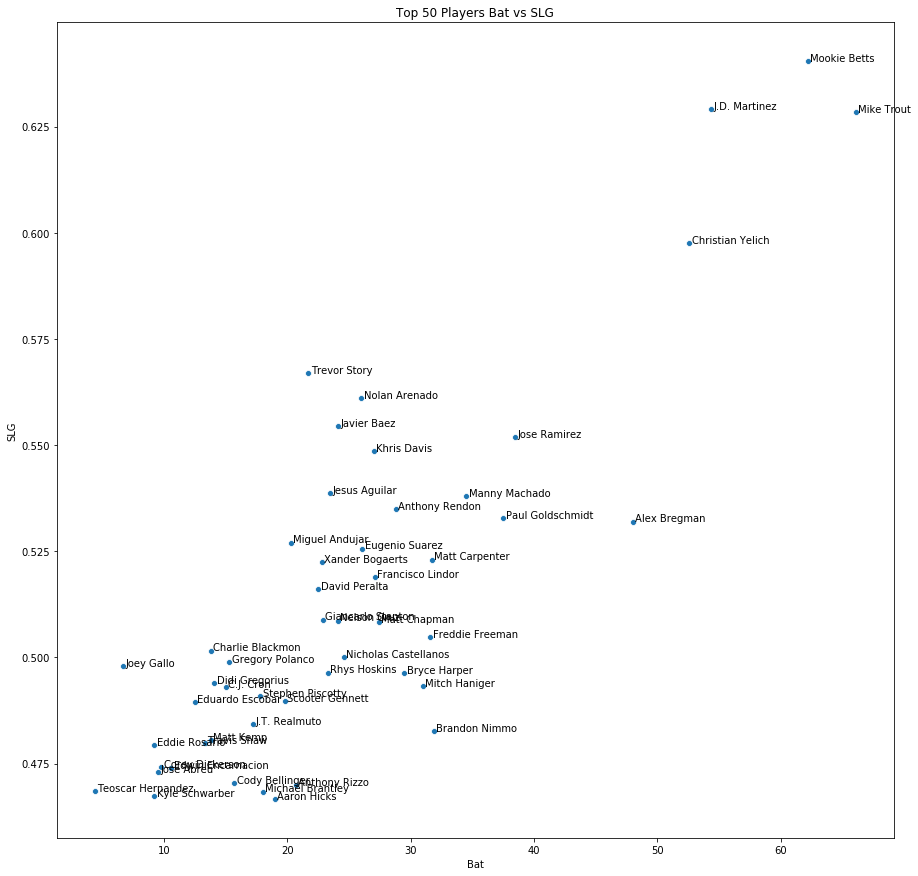

In [121]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="SLG", data=slg.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs SLG")

label_point(slg.head(50).Bat, slg.head(50).SLG, slg.head(50).Name, plt.gca())

This plot shows that we are moving in the right direction with Slugging Percentage. There is a bit more correlation between SLG and Bat than for AVG and OBP, but not enough. There are some outliers in both directions due to high or low home run totals for some players. This stat has the same flaws that Batting Average does, as it ignores Walks completely. 

## On Base Plus Slugging (OPS)
On Base Plus Slugging (OPS) combines our two best statistics from above. With OBP, we give credit to the players that draw walks and get on base at a high clip. On the other end, we give credit to players that hit home runs and produce more runs for their teams. This is a great stat because it really is the best of both worlds, as it gives credit for getting on base and hitting for extra bases, which are the two things that all great hitters are able to do effectively. Looking at our chart below, our top 5 in OPS are all in the top 6 for Batting Runs.

In [122]:
ops = slg.copy()
ops['OPS'] = ops['OBP'] + ops['SLG']
ops = ops.sort_values(by=['OPS'], ascending=False)

ops_clean = ops.copy()
ops_clean = ops_clean.drop(columns=['G','AB','PA','H','1B','2B','3B','HR','BB','IBB','HBP','SF','SH'])
ops_clean.head()

,Name,Team,WAR,BABIP,Bat,wRC+,AVG,OBP,SLG,OPS
1,Mike Trout,Angels,9.8,0.346,66.1,191,0.312102,0.459638,0.628450,1.088088
0,Mookie Betts,Red Sox,10.4,0.368,62.2,185,0.346154,0.438111,0.640385,1.078495
2,J.D. Martinez,Red Sox,5.9,0.375,54.4,170,0.330404,0.402157,0.629174,1.031331
3,Christian Yelich,Brewers,7.6,0.373,52.6,166,0.325784,0.402458,0.597561,1.000019
5,Jose Ramirez,Indians,8.0,0.252,38.5,146,0.269896,0.386819,0.551903,0.938723


## OPS, in context

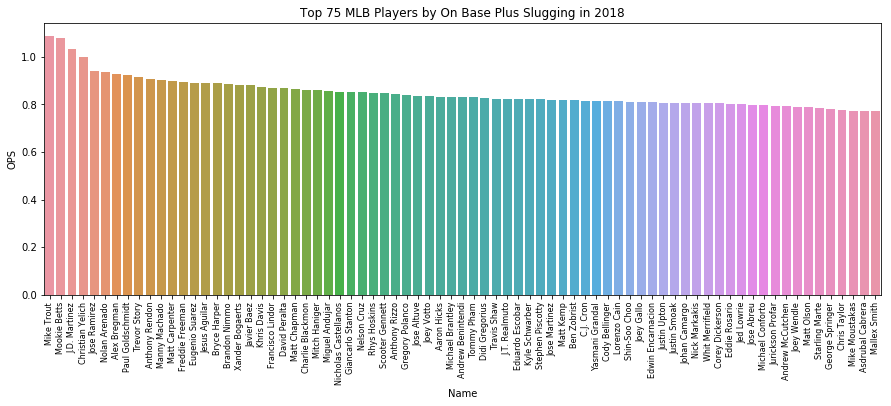

In [123]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="OPS", data=ops.head(75))
ax.set_xticklabels(ops['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by On Base Plus Slugging in 2018')
plt.show()

Again, this graph looks strangely similar to the last 3. This one is the closest that we have gotten to Batting Runs, but the slope is still much less.

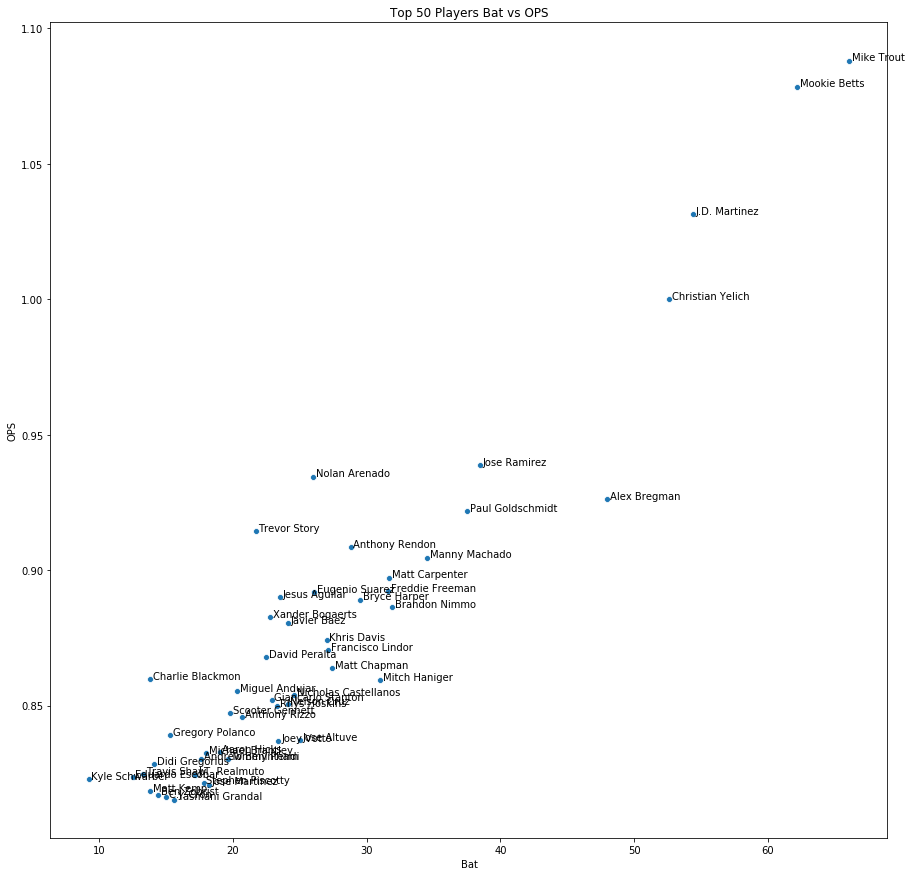

In [124]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="OPS", data=ops.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs OPS")

label_point(ops.head(50).Bat, ops.head(50).OPS, ops.head(50).Name, plt.gca())

This plot is also the best one that we have seen so far. The correlation between Batting Runs and OPS is strong, but we still have a few outliers. The three most telling outliers are Nolan Arenado, Trevor Story, and Charlie Blackmon. All three of these players are on the Colorado Rockies, who notoriously play at Coors Field in Denver, Colorado. The "Coors Effect" is often referenced in baseball stat discussions, as the thin Colorado air makes the ball travel further, inflating the stats of Rockies hitters. Using only counting stats, there is no way to account for the "Coors Effect," so it remains the most effective stat so far.

More information on the "Coors Effect" can be found here: https://rotogrinders.com/articles/the-coors-field-effect-1853198

## Isolated Power (ISO)
Isolated Power (ISO) measures the raw power of an MLB hitter. ISO gives no credit for singles, only extra base hits. It can be an effective way to see some things that OPS and SLG do not show. For example, a player with 4 singles and 0 home runs in 10 at bats (ABs) would have a .400 Batting Average (AVG) and .400 Slugging Percentage (SLG). A player with 1 home run and 0 singles in 10 at bats would have a .100 Batting Average and .400 Slugging Percentage . The first player’s ISO would be .000 and the second player’s ISO would be .300, which shows that the second player hits for more power and more extra bases. Looking at the chart below, we can already see that the players with high ISOs are ones with lots of home runs.

In [125]:
iso = ops.copy()
iso['ISO'] = iso['SLG'] - iso['AVG']
iso = iso.sort_values(by=['ISO'], ascending=False)

iso_clean = iso.copy()
iso_clean = iso_clean.drop(columns=['G','AB','PA','H','1B','2B','3B','BB','IBB','HBP','SF','SH','BABIP','wRC+'])
iso_clean.head()

,Name,Team,HR,WAR,Bat,AVG,OBP,SLG,OPS,ISO
1,Mike Trout,Angels,39,9.8,66.1,0.312102,0.459638,0.628450,1.088088,0.316348
25,Khris Davis,Athletics,48,2.6,27.0,0.246528,0.325688,0.548611,0.874299,0.302083
2,J.D. Martinez,Red Sox,43,5.9,54.4,0.330404,0.402157,0.629174,1.031331,0.298770
0,Mookie Betts,Red Sox,32,10.4,62.2,0.346154,0.438111,0.640385,1.078495,0.294231
60,Joey Gallo,Rangers,40,2.8,6.7,0.206000,0.311958,0.498000,0.809958,0.292000


## Isolated Power, in context

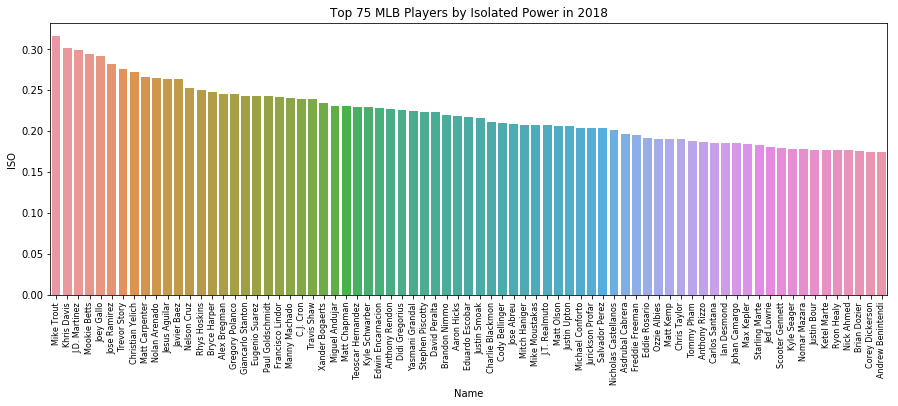

In [126]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="ISO", data=iso.head(75))
ax.set_xticklabels(iso['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Isolated Power in 2018')
plt.show()

The shape of this graph is closer to what we are looking for, but looking at the names in the top 10, we can immediately see that flaw in this stat. It only gives credit for extra base hits, especially home runs, so all of the players in the top are ones that hit many home runs.

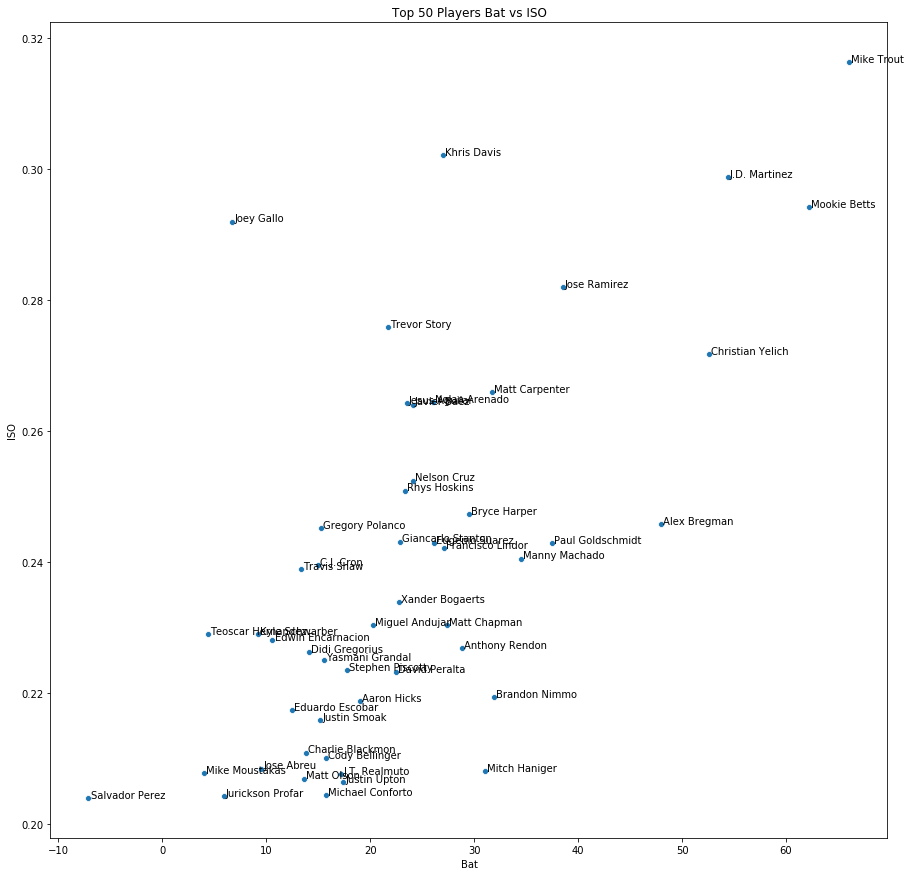

In [127]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="ISO", data=iso.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs ISO")

label_point(iso.head(50).Bat, iso.head(50).ISO, iso.head(50).Name, plt.gca())

The plot for ISO is very sparse. ISO gives a ton of credit to home run hitters, and none to players that draw walks and hit singles. Because of this, ISO is nothing more than a supporting stats for when two players are very similar in other stats like OPS.

## Weighted On-Base Average (wOBA)
wOBA is one of the best and most popular statistics to show a players full offensive output. wOBA takes into account several different factors for evaluating hitters. One of the reasons for wOBAs popularity is the fact that it is year-adjusted. This means that the coefficients in its derivation are different each year, depending on the trends of the league. This league adjustment is very important for comparing players of different eras, since baseball is evolving and changing every year. Looking at the chart below, it has the exact same top 5 players as Batting Runs.

In [128]:
wOBA = iso.copy()
wOBA['wOBA'] = ((.690 * (wOBA['BB'] - wOBA['IBB'])) + (.720 * wOBA['HBP']) + (.880 * wOBA['1B']) + \
                (1.247 * wOBA['2B']) + (1.578 * wOBA['3B']) + (2.031 * wOBA['HR'])) / \
                (wOBA['AB'] + wOBA['BB'] - wOBA['IBB'] + wOBA['SF'] + wOBA['HBP'])
wOBA = wOBA.sort_values(by=['wOBA'], ascending=False)

wOBA_clean = wOBA.copy()
wOBA_clean = wOBA_clean.drop(columns=['G','AB','PA','H','1B','2B','3B','HR','BB','IBB','HBP','SF','SH', 'BABIP', 'wRC+'])
wOBA_clean.head()

,Name,Team,WAR,Bat,AVG,OBP,SLG,OPS,ISO,wOBA
0,Mookie Betts,Red Sox,10.4,62.2,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012
1,Mike Trout,Angels,9.8,66.1,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699
2,J.D. Martinez,Red Sox,5.9,54.4,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599
3,Christian Yelich,Brewers,7.6,52.6,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096
4,Alex Bregman,Astros,7.6,48.0,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727


## Weighted On-Base Average, in Context

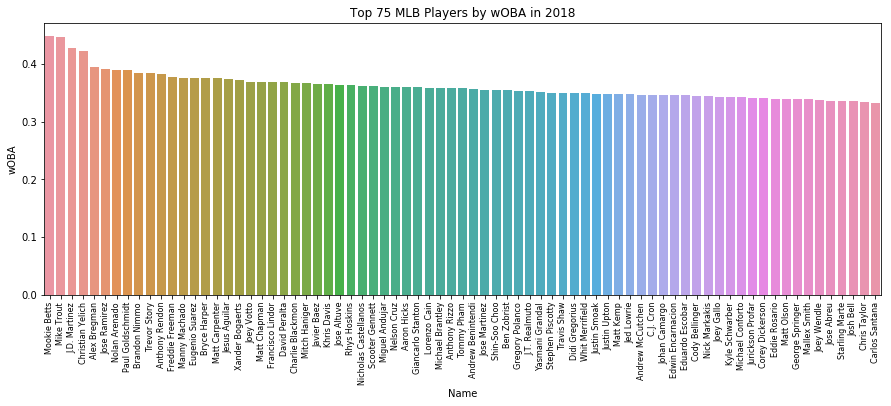

In [129]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wOBA", data=wOBA.head(75))
ax.set_xticklabels(wOBA['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wOBA in 2018')
plt.show()

This graph shape is extremely familiar. It looks mostly the same as AVG, OBP, SLG, and OPS. The players seem to be in mostly the right order but they are still a bit too close to each other when considering the skill gap in hitters.

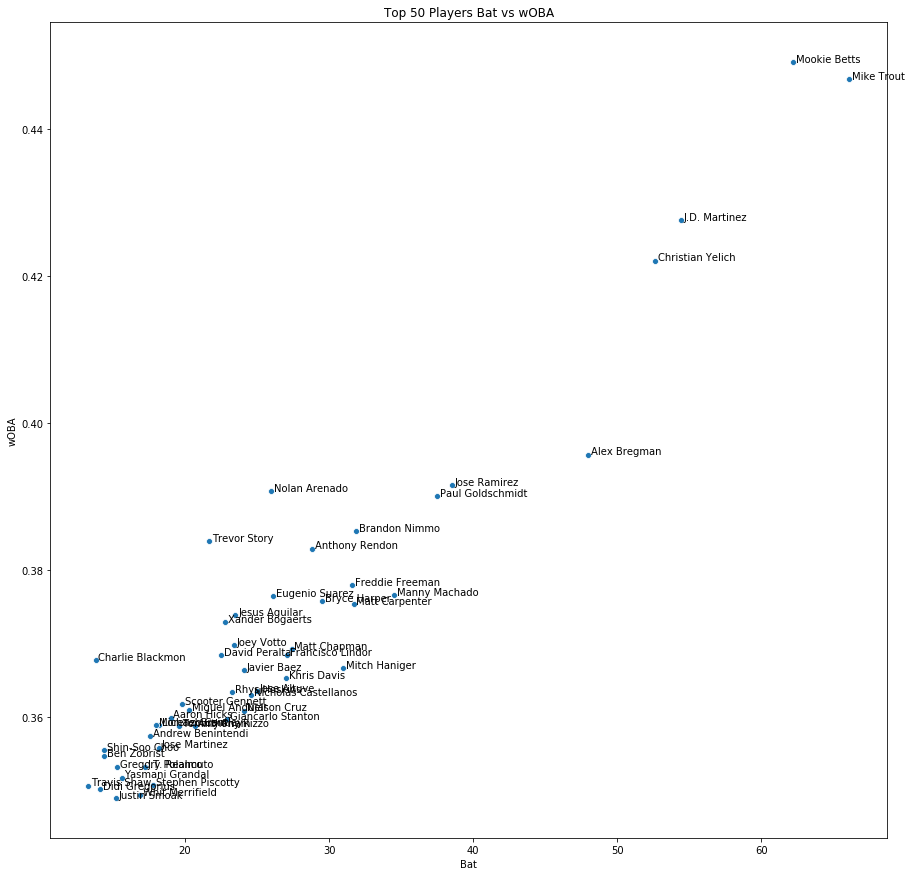

In [130]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wOBA", data=wOBA.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wOBA")

label_point(wOBA.head(50).Bat, wOBA.head(50).wOBA, wOBA.head(50).Name, plt.gca())

The correlation in the plot is very strong. The only real downside to this one is the same thing we saw with OPS. The "Coors Effect" is skewing the stats for Colorado Rockies players and wOBA does not account for this. wOBA is the best stat that we've seen so far, but we can still do better.

In [131]:
#Constants for future derivations
#from https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=8&season=2018&month=0&season1=1901&ind=0&team=0,ss&rost=0&age=0&filter=&players=0&sort=1,d
league_wOBA = .315
league_runs = 21630
league_pa = 185139
wOBA_scale = 1.226

## Weighted Runs Above Average (wRAA)
Weighted Runs Above Average (wRAA) measures the amount of offensive runs a that a player contributes to their team compared to the average player. With wRAA, 0 is league average, so we can better compare players and see what kind of value they give to their teams. wRAA uses constands such as league average wOBA and wOBA scale, two things that change each season and let us compare each player to the average. This is a very useful stat because it lets us see how much better a player is based on a raw number. Most of the other stats are percentages, but wRAA lets you get a better quantitative representation.

In [132]:
#wRAA = ((wOBA – lgwOBA)/wOBA Scale) * PA
wRAA = wOBA.copy()
wRAA['wRAA'] = ((wRAA['wOBA'] - league_wOBA) / wOBA_scale) * wRAA['PA']
wRAA = wRAA.sort_values(by=['wRAA'], ascending=False)

wRAA_clean = wRAA.copy()
wRAA_clean = wRAA_clean.drop(columns=['G','AB','PA','H','1B','2B','3B','HR','BB','IBB','HBP','SF','SH','BABIP','wRC+'])
wRAA_clean.head()

,Name,Team,WAR,Bat,AVG,OBP,SLG,OPS,ISO,wOBA,wRAA
0,Mookie Betts,Red Sox,10.4,62.2,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012,67.115084
1,Mike Trout,Angels,9.8,66.1,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699,65.312547
2,J.D. Martinez,Red Sox,5.9,54.4,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599,59.605698
3,Christian Yelich,Brewers,7.6,52.6,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096,56.867203
4,Alex Bregman,Astros,7.6,48.0,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727,46.421251


## Weighted Runs Above Average, in context

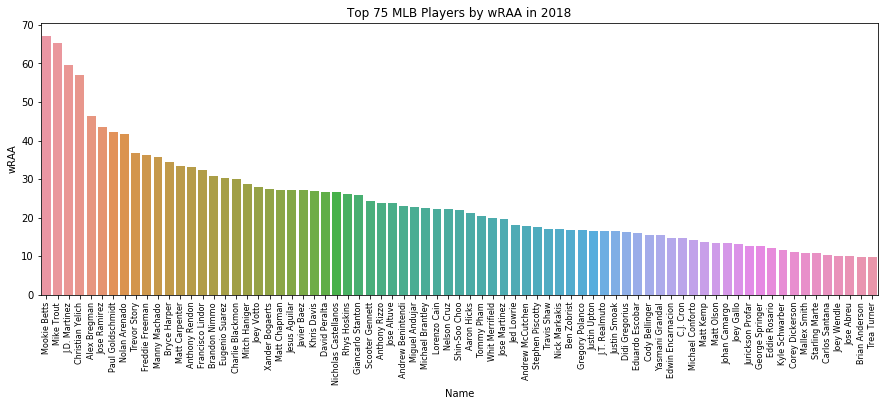

In [133]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wRAA", data=wRAA.head(75))
ax.set_xticklabels(wRAA['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wRAA in 2018')
plt.show()

Because a player with a wRAA of 0 is league average, this graph is much more telling. We can really see how players compare to each other. It also really shows how much better some of the top players are compared to the rest of the league.

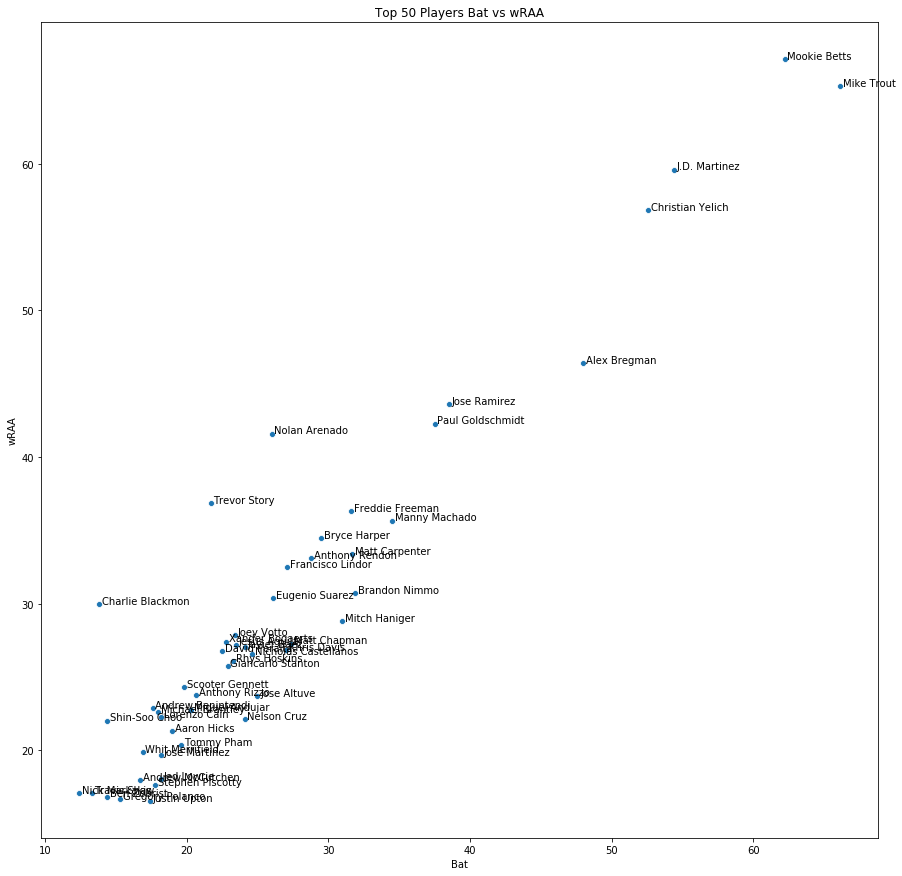

In [134]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wRAA", data=wRAA.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wRAA")

label_point(wRAA.head(50).Bat, wRAA.head(50).wRAA, wRAA.head(50).Name, plt.gca())

Aside from the same 3 outliers that we keep seeing, wRAA seems to be the perfect stat. It gives us a clear number instead of a percentage for easy comparison, and really shows the talent gap for the league's best. This is a very strong stat, given this correlation, but we can STILL do better and eliminate these outliers.

## Weighted Runs Created (wRC)
Weighted Runs Created (wRC) is very similar to wRAA, but it is not scaled to the league average. wRC instead, gives more credit to players that play more games, as points are accrued over time. This presents some advantages and disadvantages. It is good because it gives more stock in players that have sustained success over a full season as opposed to a small sample size, but we already accounted for that in our dataset by only including qualified hitters. It can be a disadvantage because we cannot compare players to each other as easily, since not all players appear in the same number of games.

In [135]:
#wRC = (((wOBA-League wOBA)/wOBA Scale)+(League R/PA))*PA
wRC = wRAA.copy()
wRC['wRC'] = (((wRC['wOBA'] - league_wOBA) / wOBA_scale) + league_runs / league_pa) * wRC['PA']
wRC = wRC.sort_values(by=['wRC'], ascending=False)

wRC_clean = wRC.copy()
wRC_clean = wRC_clean.drop(columns=['G','AB','PA','H','1B','2B','3B','HR','BB','IBB','HBP','SF','SH','wRC+','BABIP'])
wRC_clean.head()

,Name,Team,WAR,Bat,AVG,OBP,SLG,OPS,ISO,wOBA,wRAA,wRC
0,Mookie Betts,Red Sox,10.4,62.2,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012,67.115084,138.849402
1,Mike Trout,Angels,9.8,66.1,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699,65.312547,136.345878
2,J.D. Martinez,Red Sox,5.9,54.4,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599,59.605698,135.429107
3,Christian Yelich,Brewers,7.6,52.6,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096,56.867203,132.924274
4,Alex Bregman,Astros,7.6,48.0,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727,46.421251,128.787203


## Weighted Runs Created, in context

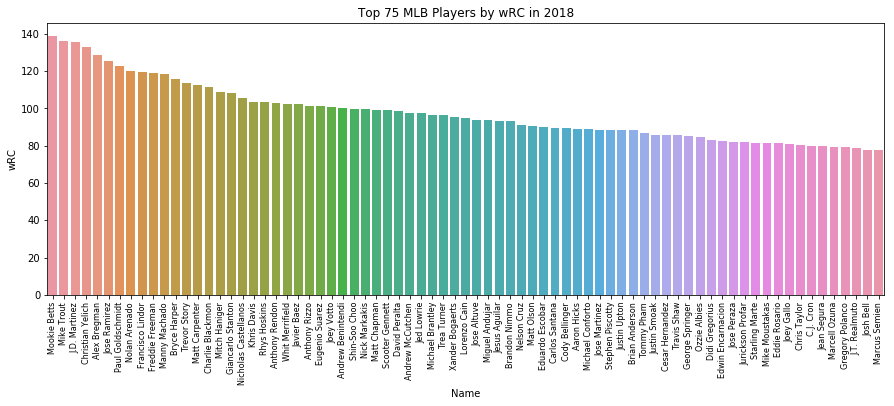

In [136]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wRC", data=wRC.head(75))
ax.set_xticklabels(wRC['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wRC in 2018')
plt.show()

This graph is deceiving because, like was mentioned above, wRC does not adjust for games played. Because of this, it is hard to get a real judgement for a players performance if they missed any time for injury or other reasons. It is great for seeing exactly how well a player performed in a season, but maybe not for their skill.

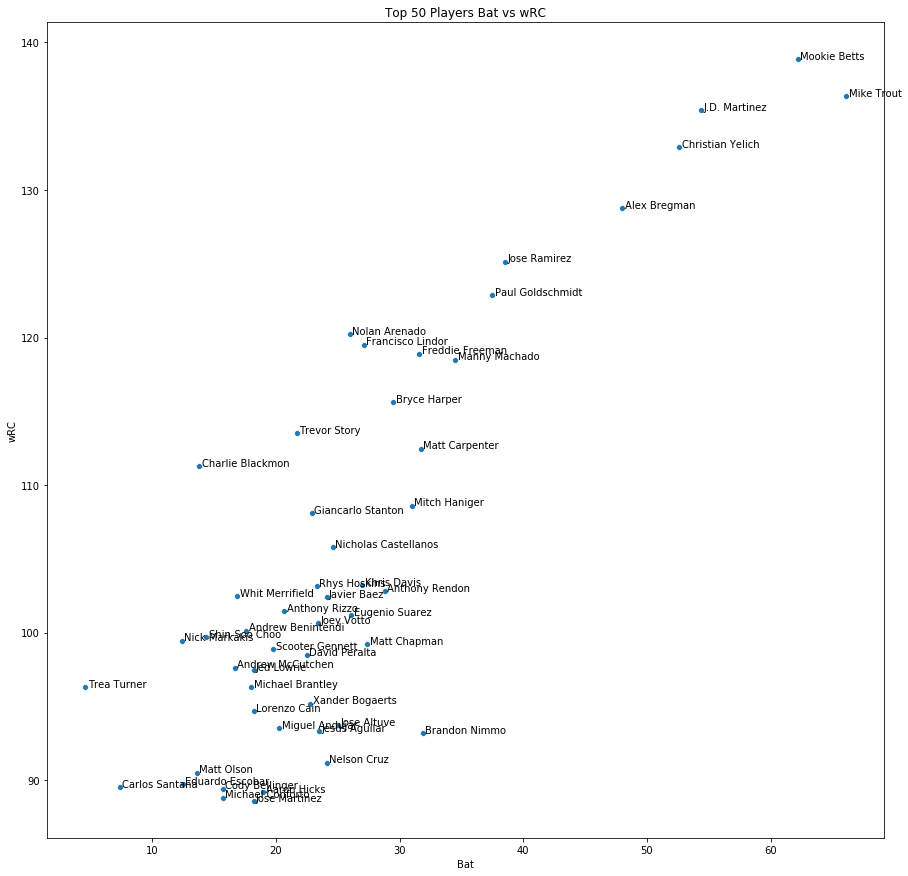

In [137]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wRC", data=wRC.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wRC")

label_point(wRC.head(50).Bat, wRC.head(50).wRC, wRC.head(50).Name, plt.gca())

This plot shows less correlation than the others because of the variables that it does not account for. Also, we still have those 3 outliers. wRC is not a bad stat, but I would not consider it one of the most effective ones.

## Weighted Runs Created Plus (wRC+)
Weighted Runs Created Plus (wRC+) is a combination of wRC and wRAA, while also adjusting for park factors. This means that players that play in "Hitter Friendly" stadiums like Coors Field or "Pitcher Friendly" stadiums are given the different treatments. Also, wRC+ scales so that 100 is league average, so it still allowes for quantitative comparison of players with whole numbers instead of percentages.

In [143]:
wRC_plus = wRC.copy()
wRC_plus = wRC_plus.sort_values(by=['wRC+'], ascending=False)

wRC_plus_clean = wRC_plus.copy()
wRC_plus_clean = wRC_plus_clean.drop(columns=['G','AB','PA','H','1B','2B','3B','HR','BB','IBB','HBP','SF','SH','BABIP'])
wRC_plus_clean = wRC_plus_clean[['Name', 'Team', 'WAR', 'Bat', 'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'wOBA', 'wRAA', 'wRC', 'wRC+']]
wRC_plus_clean.head()

,Name,Team,WAR,Bat,AVG,OBP,SLG,OPS,ISO,wOBA,wRAA,wRC,wRC+
1,Mike Trout,Angels,9.8,66.1,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699,65.312547,136.345878,191
0,Mookie Betts,Red Sox,10.4,62.2,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012,67.115084,138.849402,185
2,J.D. Martinez,Red Sox,5.9,54.4,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599,59.605698,135.429107,170
3,Christian Yelich,Brewers,7.6,52.6,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096,56.867203,132.924274,166
4,Alex Bregman,Astros,7.6,48.0,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727,46.421251,128.787203,157


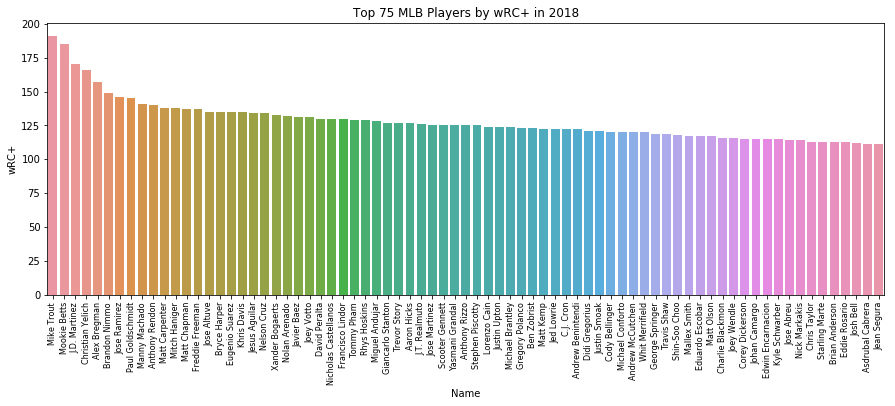

In [139]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wRC+", data=wRC_plus.head(75))
ax.set_xticklabels(wRC_plus['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wRC+ in 2018')
plt.show()

This graph, again, looks a lot like the others. But, because wRC+ is centered at 100, not 0 we must adjust for that to get a true representation

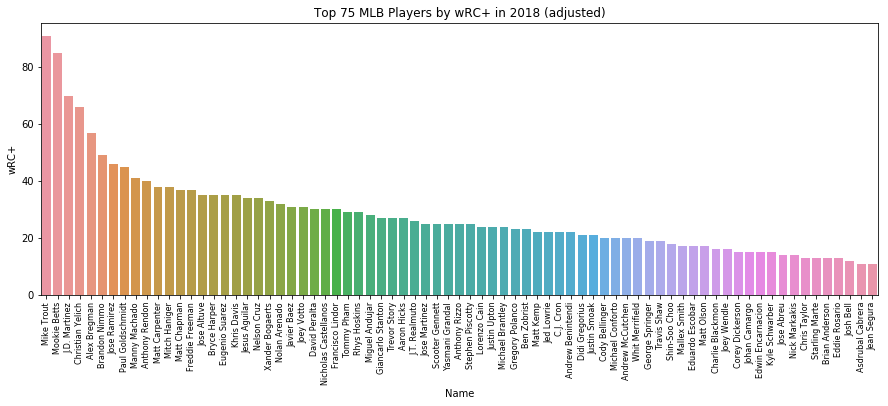

In [146]:
adjusted = wRC_plus.copy()
adjusted['wRC+'] = adjusted['wRC+'] - 100
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wRC+", data=adjusted.head(75))
ax.set_xticklabels(adjusted['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wRC+ in 2018 (adjusted)')
plt.show()

Once adjusted, we can see that wRC+ is very similar to Batting Runs. It effectively shows the skill gap, and also is able to eliminated park factors

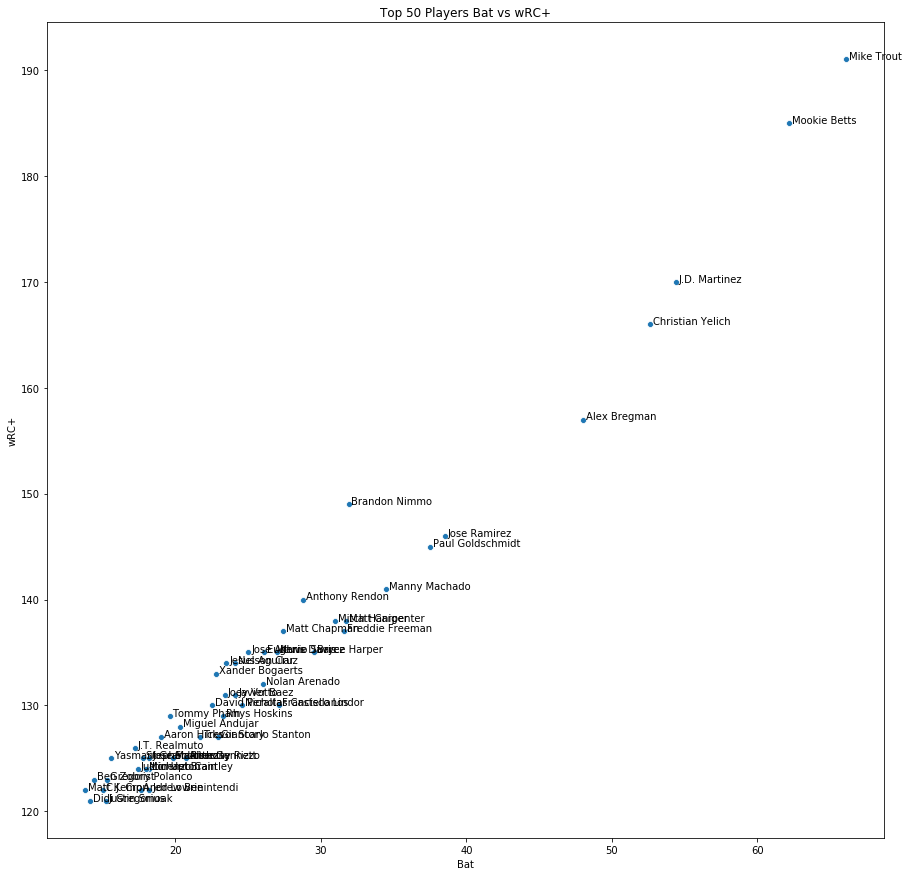

In [149]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wRC+", data=wRC_plus.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wRC+")

label_point(wRC_plus.head(50)['Bat'], wRC_plus.head(50)['wRC+'], wRC_plus.head(50).Name, plt.gca())

Looking at the plot for wRC+ reaffirms our thoughts that it is very similar to Batting Runs. Apart from one outlier, the correlation between the two is extremely strong. 

In [159]:
wRC_plus.head(1)

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,Bat,wRC+,AVG,OBP,SLG,OPS,ISO,wOBA,wRAA,wRC
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,66.1,191,0.312102,0.459638,0.62845,1.088088,0.316348,0.446699,65.312547,136.345878


In [163]:
results = wRC_plus.copy()

avg_corr = results['AVG'].corr(results['Bat'])
obp_corr = results['OBP'].corr(results['Bat'])
slg_corr = results['SLG'].corr(results['Bat'])
iso_corr = results['ISO'].corr(results['Bat'])
woba_corr = results['wOBA'].corr(results['Bat'])
wraa_corr = results['wRAA'].corr(results['Bat'])
wrc_corr = results['wRC'].corr(results['Bat'])
wrcplus_corr = results['wRC+'].corr(results['Bat'])


print ("Correlation between AVG and Bat: " + str(avg_corr))
print ("Correlation between OBP and Bat: " + str(obp_corr))
print ("Correlation between SLG and Bat: " + str(slg_corr))
print ("Correlation between ISO and Bat: " + str(iso_corr))
print ("Correlation between wOBA and Bat: " + str(woba_corr))
print ("Correlation between wRAA and Bat: " + str(wraa_corr))
print ("Correlation between wRC and Bat: " + str(wrc_corr))
print ("Correlation between wRC+ and Bat: " + str(wrcplus_corr))

Correlation between AVG and Bat: 0.673467646539
Correlation between OBP and Bat: 0.875708731005
Correlation between SLG and Bat: 0.90031931012
Correlation between ISO and Bat: 0.723340831455
Correlation between wOBA and Bat: 0.980558798444
Correlation between wRAA and Bat: 0.98202512563
Correlation between wRC and Bat: 0.930609141952
Correlation between wRC+ and Bat: 0.994922381626


## Conclusion

Our null hypothesis of "All stats will represent players equally" can be proven incorrect by the correlations numbers above. Just by looking at all of our plots, we can tell that some stats are more effective that others, but the correlations put it into numbers for us. Like we thought, wRC+ is the best stat to represent each batter, with wOBA and wRAA close behind.

Given all of the information, wRC+ is potentially better than Batter Runs because it can be derived easier than assigning point values to every single play that occurs. Given some simple counting stats and park factors, we can derive an extrememly accurate stat to easily compare players to each other, and also tell how a single player is doing by comparing them to the league average. 

The emergence of Sabermetrics makes evaluating players so much easier and efficient, and also allows teams to take advantage of marker ineffieciencies, much like the Oakland A's were able to do during the Moneyball Era.